# by dropping na instead of taking mean  accuracy increaased

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.line.linear_model import LinearRegression

In [2]:
startups=pd.read_csv('50_Startups.csv')

In [3]:
startups

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         48 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  47 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


# Exploring the data

In [5]:
startups.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.269749,0.708253,0.977401
Administration,0.269749,1.000000,-0.076943,0.200717
MarketingSpend,0.708253,-0.076943,1.000000,0.747434
Profit,0.977401,0.200717,0.747434,1.000000


In [6]:
startups.corr()[['Profit']]

,Profit
RDSpend,0.977401
Administration,0.200717
MarketingSpend,0.747434
Profit,1.000000


In [7]:
startups.isna()

,RDSpend,Administration,MarketingSpend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [8]:
startups.isna().sum()

RDSpend           2
Administration    0
MarketingSpend    3
State             0
Profit            0
dtype: int64

In [9]:
startups.dropna(inplace=True)
# make permenant changes where na there and fill it with mean

In [ ]:
# checkc outliers

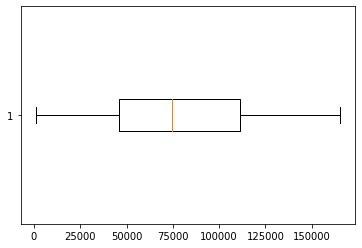

In [43]:
plt.boxplot(startups['RDSpend'], vert=False);

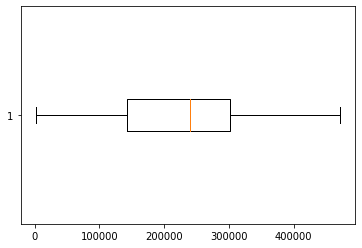

In [44]:
plt.boxplot(startups['MarketingSpend'], vert=False);

In [10]:
# Dealing with ordinary cell

# split data into x anad y 
## (x is holds independent column and y dependent col)

In [11]:
x=startups.iloc[:,:-1].values
# all column excluding last(profit ) because this is dependent we make making model for profit
x.shape

(46, 4)

In [12]:
y=startups.iloc[:,-1].values
# profit column
y.shape

(46,)

# steps to make Model

In [13]:
# step 1: corelation between dependent variable and independent variable
# step 2: scactter plot to check linearity (check ML_linear regression file)
# step 3: check fro ordinal and nominal data
# step 3.a: label encoding
# step 3.b: one hot encoding
# step4: split data and traingin and testing (if total 50 rows are there 40 to train the model 10 for testing)
# step 5: Fit the model
# step6: validate the model

# To make a model we use training data
# model.fit(x_train,y_tran)

# ones the model creating done
# predicted value must be based on test data
# y_pred=model.predict(x_test)
# then compare y_pred and Y-test
# the more high score more good our model is highes is 1
# can be calculated by r2_score(y_pred,y_test)


# Dealing with strings to to 
### notice states here we are encoing to number

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
x


array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [16]:
lab_en=LabelEncoder()
x[:,3]=lab_en.fit_transform(x[:,3])  # here we are taking 3rd column to tranform string into number 
# fit takes state column check how many unique states ,
# transform assign each state to that number

In [17]:
x

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 303319.26, 1],
       [67532.53, 105751.03

In [18]:
# lab_en.inverse_tranform([2])

# HOt one encoder to  make it in binary 
### column wise wherewver states matches it become 1 all other are zeros in row

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [20]:
ct = ColumnTransformer(
        [('ohe', OneHotEncoder(categories='auto'),[3])],  #3 is column number where we want to apply state column has 3 index
        remainder = 'passthrough'
        )
# list of tuples
#    List of (name, transformer, column(s)) tuples specifying the
#    transformer objects to be applied to subsets of the data.


In [21]:
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [22]:
# profit=b1*col1 + b2*col2+ b3*col3 + b4*RDExp +b5*Admin +b6*MarketExp

# where b1,b2...b6 are regression coefficient

# split the data into traingin and testing

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y ,
                                               test_size= 0.2, 
                                               random_state=0 )

# test_size is testing size we are giving 0.2 means 20% data for testing
# random state is a seed value
# you can give any seed value
# to replicate the result , use same seed value
# by changing the random state to 100 accuracy may increaase or decrese depending on the data the choose

# we cannot change the random state value and check accuracy it changes with the random data
## then we will go with K fold

In [25]:
# all rows containing na are dropped
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36, 6) (10, 6) (36,) (10,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model =LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)

[ 6.95183354e+02 -5.25174719e+02 -1.70008635e+02  7.66181777e-01
 -3.70426428e-02  2.14831681e-02]
57009.6607804677


In [28]:
model =LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=model.predict(x_test)
y_pred

array([111740.7360831 , 110856.7801201 , 103738.3352662 , 169845.60534472,
       135394.83586926, 102490.97846327, 101657.65601481, 136803.00268904,
       117643.36790065,  99796.45318856])

# to calculate accuracy  we use r2 scores

In [30]:
from sklearn.metrics import r2_score

In [31]:
y_test


array([105733.54, 108733.99, 101004.64, 166187.94, 146121.95,  97427.84,
        99937.59, 144259.4 , 111313.02,  96778.92])

In [32]:
r2_score(y_test,y_pred)
# truth value 1st, predicted value 2nd
# 94 % accuracy of the model

0.9443805044678256

# K -Fold

In [33]:
from sklearn.model_selection import cross_validate


In [34]:
model_cv=LinearRegression()  
model_cv.fit(x_train,y_train)
cv=cross_validate(model_cv,x_train,y_train, cv=5)
# if we dont provide it , it take 5 fold by default

In [35]:
type(cv)

dict

In [36]:
cv

{'fit_time': array([0.0040319 , 0.00394201, 0.00393343, 0.0039382 , 0.00299764]),
 'score_time': array([0.00228143, 0.00304437, 0.00204635, 0.00204039, 0.00194192]),
 'test_score': array([0.94347827, 0.96918442, 0.92138054, 0.91255217, 0.96975072])}

In [37]:
cv['test_score']

array([0.94347827, 0.96918442, 0.92138054, 0.91255217, 0.96975072])

In [38]:
cv['test_score'].mean()

0.9432692253061216

In [39]:
# RDExpe=142110  and Market_exp=367102
# c1= np.array([[142110,367102]]).reshape(-1,2)

In [40]:
model_cv.predict(np.array([[142110,367102]]).reshape(-1,2))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 2)